# 02) Alignemnt of Covid-19 Seqs

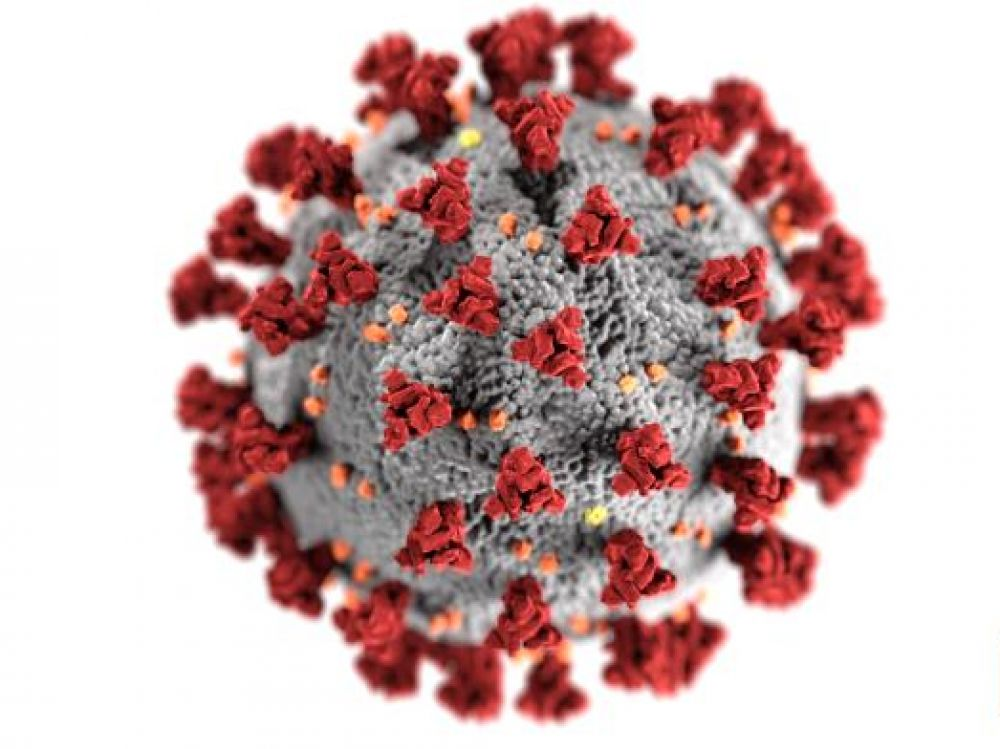

- <span style="background:yellow"><b> How to install Biopython library?</b></span>
- <o>`!pip install Biopython`</o>

In [1]:
!pip install Biopython

### Start by downloading and installing Clustalw software

In [2]:
# Global sequence alignment with ClustalW
# import the commandline software
from Bio.Align.Applications import ClustalwCommandline
in_file = "covid_sequence.fasta"
# parsing DNA file (Unaligned)
clustalw_cline = ClustalwCommandline("clustalw2", infile= in_file)
#performing the alignment
# printing the output
print(clustalw_cline)

clustalw2 -infile=unaligned.fasta


In [2]:
from Bio.Align.Applications import TCoffeeCommandline
tcoffee_cline = TCoffeeCommandline(infile="covid_sequence.fasta",
                                   output="clustalw",
                                   outfile="covid_sequence.aln")
print(tcoffee_cline)

t_coffee -output clustalw -infile covid_sequence.fasta -outfile covid_sequence.aln


# reading or parsing sequence alignments

there are two functions

 `Bio.AlignIO.read() ` in case there was a single-multiple seqs to be aligned

`Bio.AlignIO.parse()`
 
 
 

In [3]:
#import clustalw from Biopython
#step1) 
from Bio.Align.Applications import ClustalwCommandline
cline = ClustalwCommandline("clustalw2", infile = "covid_sequence.fasta")
print(cline)
# path 
# C:\Program Files (x86)\ClustalW2

clustalw2 -infile=covid_sequence.fasta


In [4]:
# A) assertion
#B) Run Clustal W fasta
import os
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "covid_sequence.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=covid_sequence.fasta


# this will create the following files for you: 
- 1) FileName.aln   --> example:<span style="background:yellow"> unaligned.aln </span>


- 2) FileName.dnd   --> example:<span style="background:yellow"> unaligned.dnd </span>

In [5]:
#Generate Alignment output
from Bio import AlignIO
ClustalAlign = AlignIO.read("covid_sequence.aln", "clustal")
print(ClustalAlign)

Alignment with 15 rows and 1945 columns
--------------------------------------------...--- YP_009742612.1
--------------------------------------------...--- YP_009725312.1
--------------------------------------------...--- YP_009742611.1
APTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTV...KGG YP_009742610.1
--------------------------------------------...--- YP_009725318.1
--------------------------------------------...--- YP_009742613.1
--------------------------------------------...--- YP_009742614.1
--------------------------------------------...--- YP_009742616.1
--------------------------------------------...--- YP_009742609.1
--------------------------------------------...--- YP_009742617.1
--------------------------------------------...--- YP_009725310.1
--------------------------------------------...--- YP_009725311.1
--------------------------------------------...--- YP_009725309.1
--------------------------------------------...--- YP_009742615.1
------------------------------------

In [7]:
# Generate Dendogram (Tree) output
from Bio import Phylo
tree = Phylo.read("tcovid_sequencednd.dnd", "newick")
Phylo.draw_ascii(tree)

   _____________________________________________________ YP_009725309.1
 ,|
 ||   ___________________________________________________ YP_009742612.1
 ||__|
 |   |____________________________________________________ YP_009742616.1
 |
 |  _____________________________________________________ YP_009725311.1
 |_|
 | |________________________________________________________ YP_009742617.1
 |
 |    ____________________________________________________ YP_009725310.1
 | __|
 ||  |____________________________________________________ YP_009742614.1
 ,|
 ||  _________________________________________________________ YP_009725318.1
_||_|
 |  |_____________________________________________________ YP_009742613.1
 |
 |                    _______________________________________ YP_009725312.1
 |      _____________|
 | ____|             |___________________ YP_009742610.1
 ||    |
 ||    |________________________________________________ YP_009742611.1
 ||
 ||_____________________________________________

In [8]:
from Bio.Phylo.TreeConstruction import DistanceCalculator

#calculate the distance matrix
calculator = DistanceCalculator('identity')
#adds distance matrix to the calculator object and returns it
dm = calculator.get_distance(ClustalAlign)
print(dm)

YP_009742612.1	0
YP_009725312.1	0.15372750642673527	0
YP_009742611.1	0.23444730077120823	0.2560411311053985	0
YP_009742610.1	0.9809768637532134	0.9984575835475579	0.974293059125964	0
YP_009725318.1	0.1552699228791774	0.023650385604113144	0.2524421593830334	0.9969151670951156	0
YP_009742613.1	0.1655526992287918	0.14858611825192802	0.251413881748072	0.9928020565552699	0.1460154241645244	0
YP_009742614.1	0.15321336760925452	0.04318766066838042	0.25192802056555275	0.9948586118251928	0.04164524421593829	0.1460154241645244	0
YP_009742616.1	0.15732647814910028	0.057583547557840564	0.25449871465295626	0.9958868894601542	0.056041131105398434	0.14755784061696653	0.05501285347043705	0
YP_009742609.1	0.31465295629820056	0.32750642673521846	0.3095115681233933	0.970694087403599	0.32596401028277633	0.3197943444730077	0.32493573264781495	0.3269922879177378	0
YP_009742617.1	0.1645244215938303	0.07197943444730082	0.25912596401028276	0.9928020565552699	0.07095115681233932	0.14807197943444728	0.0699228791

In [9]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

#initialize a DistanceTreeConstructor object based on our distance calculator object
constructor = DistanceTreeConstructor(calculator)

#build the tree
upgma_tree = constructor.build_tree(ClustalAlign)

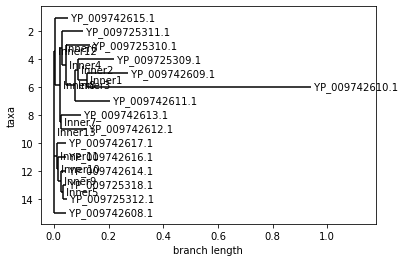

In [10]:
from Bio import Phylo
import pylab
#draw the tree
Phylo.draw(upgma_tree)

In [2]:
from Bio.Align.Applications import TCoffeeCommandline
tcoffee_cline = TCoffeeCommandline(infile="unaligned.fasta",
                                   output="clustalw",
                                   outfile="aligned.aln")
print(tcoffee_cline)


t_coffee -output clustalw -infile unaligned.fasta -outfile aligned.aln
